Cell 1 (import + DB connection)

In [1]:
from pathlib import Path

import sqlite3

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

project_root = Path.cwd().parent

db_path = project_root / "data" / "Synthetic Dataset" / "product_analytics.db"

conn = sqlite3.connect(db_path)

Cell 2 (pull daily revenue time series)

In [2]:
query = """

SELECT
    
    DATE(order_ts) AS day,

    SUM(net_revenue) AS revenue

FROM orders

GROUP BY day

ORDER BY day;

"""

ts = pd.read_sql_query(query, conn)

ts["day"] = pd.to_datetime(ts["day"])

ts = ts.set_index("day")

ts.head()

,revenue
day,
2024-01-01,1422.22
2024-01-02,1456.57
2024-01-03,1459.21
2024-01-04,2009.31
2024-01-05,1429.87


Cell 3 (plot raw series)
   - Always do this first.
   - As a rule never decompose data you haven't visually inspected.

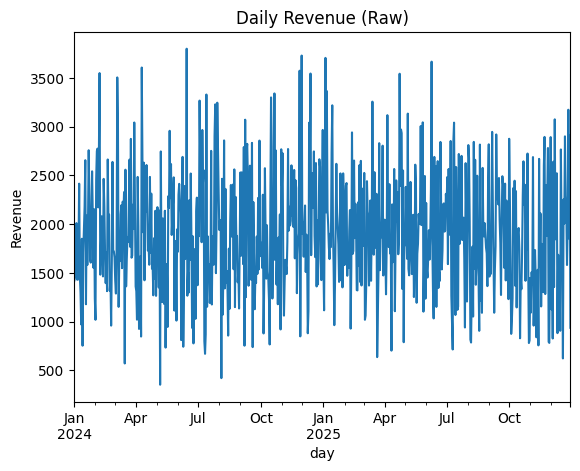

In [3]:
ts["revenue"].plot(title="Daily Revenue (Raw)")

plt.ylabel("Revenue")

plt.show()

Cell 4 (rolling mean "trend extraction")

      - This is trend vs noise separation

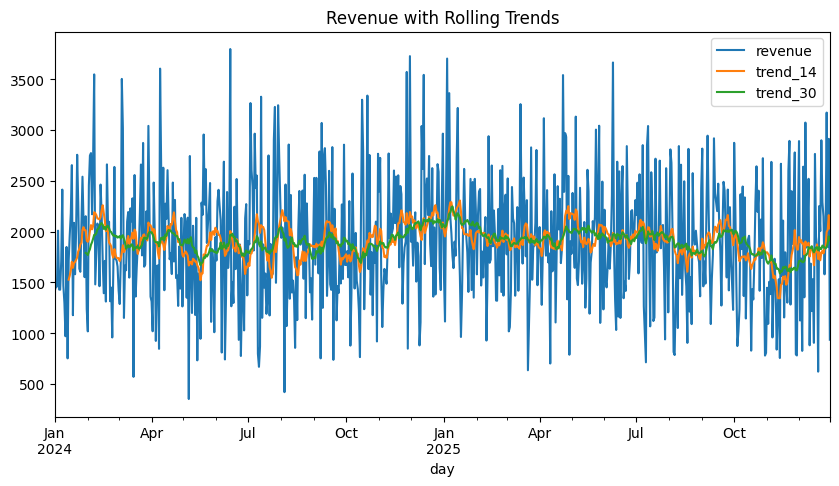

In [4]:
ts["trend_14"] = ts["revenue"].rolling(14).mean()

ts["trend_30"] = ts["revenue"].rolling(30).mean()

ts[["revenue", "trend_14", "trend_30"]].plot(

    title="Revenue with Rolling Trends",

    figsize=(10,5)

)

plt.show()

Cell 5 (detrend series "pure noise")

    - Quants defenition of "removing the signal."

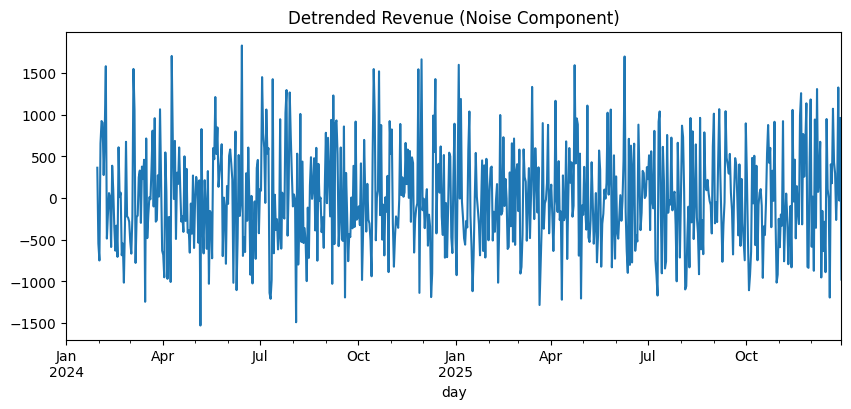

In [5]:
ts["detrended"] = ts["revenue"] - ts["trend_30"]

ts["detrended"].plot(

    title="Detrended Revenue (Noise Component)",

    figsize=(10,4)

)

plt.show()

Cell 6 (volatility of noise vs raw)
   
   - Inerpretation:
   - Trend inflates apparent volatility.
   - Removing trend reveals true noise level.

In [7]:
raw_vol = ts["revenue"].diff().std()

noise_vol = ts["detrended"].std()

raw_vol, noise_vol

(np.float64(873.4503341878619), np.float64(610.4172517243954))

## Day 6 - Trend vs Noise

       - Rolling averages isolate long term structure from short term variability.
       - Detrending reveals the true noise component of the series.
       - Apparent volatility can be driven by trend rather than randomness.
       - Signal extraction requires separating structure from noise before modeling.


     These concepts are critical for robust time series analysis.